# one to many
## 中田竜明

In [1]:
include("da.jl")

DA

ソースコードはこちら [ソースコード](https://github.com/nswa17/DA_alg.jl/blob/master/da.jl)

実行例:

In [2]:
DA.call_match([1 2; 2 1; 0 0], [1 2; 2 1; 0 0], [1, 1])

([1,2],[1,2],[1,2,3])

引数２つだと1 to 1バージョンが呼ばれます.

In [3]:
DA.call_match([1 2; 2 1; 0 0], [1 2; 2 1; 0 0])

([1,2],[1,2])

stableかどうかチェックする関数も中身を変更しました.

In [4]:
DA.stable_matching([1, 2], [1, 2], [1, 2, 3], [2 1; 1 2; 0 0], [2 1; 1 2; 0 0])

false

In [5]:
DA.stable_matching([1, 2], [1, 2], [2 1; 1 2; 0 0], [2 1; 1 2; 0 0])

false

In [6]:
DA.stable_matching([2, 1], [1, 2], [1, 2, 3], [2 1; 1 2; 0 0], [2 1; 1 2; 0 0])

true

In [7]:
DA.stable_matching([2, 1], [1, 2], [2 1; 1 2; 0 0], [2 1; 1 2; 0 0])

true

テストを行います

In [8]:
deferred_acceptance = DA.call_match
include("test_deferred_acceptance.jl")
print()

Test Summary: | Pass  Total
Testing da.jl |   10     10


通ったようです.

またスピードを計測してみます. まずは応募が実質1 to 1となるケースにおいて, 様々な人数に対して1tomanyと1to1のスピードを計測します.

In [9]:
one2one_times = Float64[]
one2many_times = Float64[]
for i in 1:20
    m = i * 100
    n = i * 100
    m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
    caps = ones(Int, n)
    _, elapsedtime, _, _, _ = @timed DA.call_match(m_prefs, f_prefs, caps)
    push!(one2many_times, elapsedtime)
    _, elapsedtime, _, _, _ = @timed DA.call_match(m_prefs, f_prefs)
    push!(one2one_times, elapsedtime)
end

In [10]:
using PyPlot

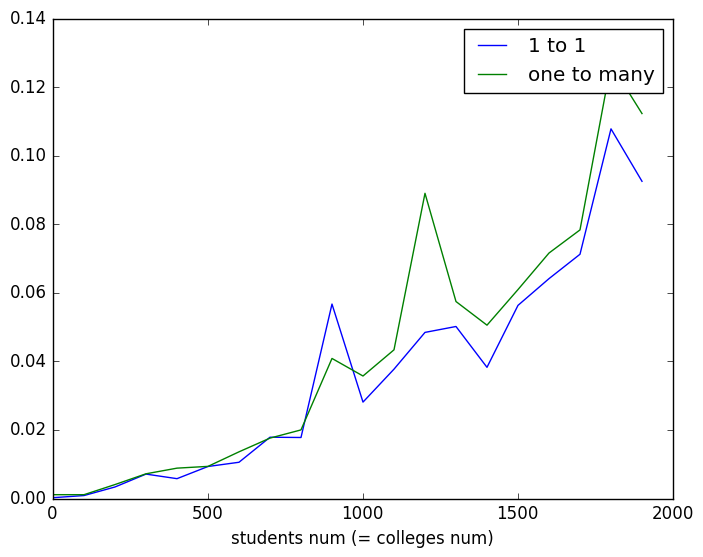

PyObject <matplotlib.legend.Legend object at 0x32741b940>

In [11]:
plot(collect(1:100:2000), one2one_times, label="1 to 1")
plot(collect(1:100:2000), one2many_times, label="one to many")
PyPlot.xlabel("students num (= colleges num)")
legend()

マッチングの人数が2000以下の時にはほぼ等しいようです. つぎは人数を固定してそれぞれのアルゴリズムを計測します. まずは300人のとき,

In [12]:
using Matching

In [13]:
function speedtest_plot(m, n)
    one2one_times = Float64[]
    one2many_times = Float64[]
    for i in 1:20
        m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
        caps = ones(Int, n)
        _, elapsedtime, _, _, _ = @timed DA.call_match(m_prefs, f_prefs, caps)
        push!(one2many_times, elapsedtime)
        _, elapsedtime, _, _, _ = @timed DA.call_match(m_prefs, f_prefs)
        push!(one2one_times, elapsedtime)
    end
    plot(one2one_times, label="1 to 1")
    plot(one2many_times, label="one to many")
    PyPlot.xlabel("test No.")
    legend()
end

speedtest_plot (generic function with 1 method)

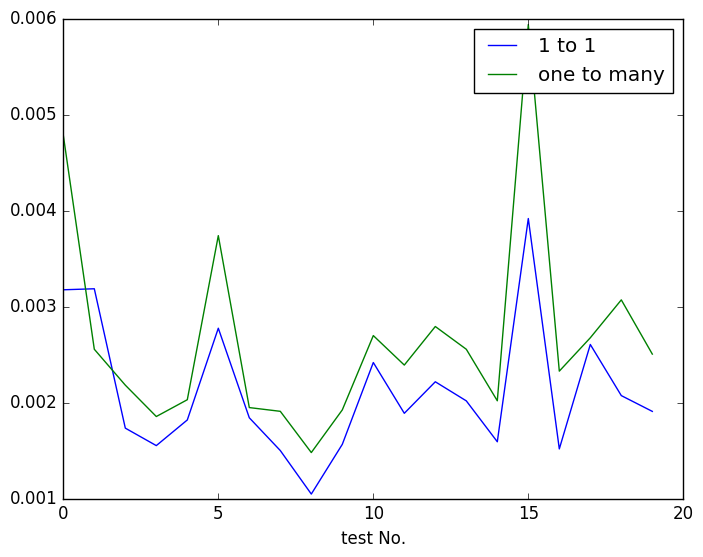

PyObject <matplotlib.legend.Legend object at 0x323da5e48>

In [14]:
speedtest_plot(300, 300)

one2oneのアルゴリズムのほうが少しだけ早いみたいです..? 次は4000人の時,

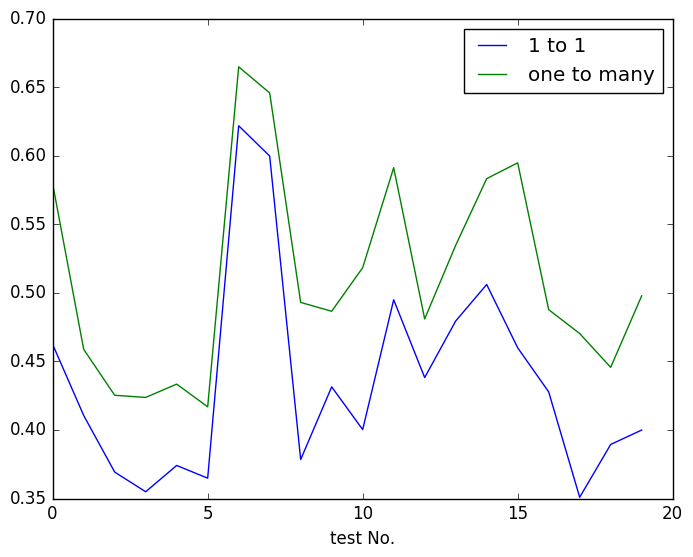

PyObject <matplotlib.legend.Legend object at 0x311151828>

In [15]:
speedtest_plot(4000, 4000)

one2oneのほうが少し早いようです.

次はone2manyの受け入れ側の数を固定して計測します.

In [16]:
function speedtest_plot2(ms, n)
    timess = Float64[]
    for m in ms
        times = Float64[]
        s_prefs, c_prefs, caps = random_prefs(m, n, ReturnCaps)
        for i in 1:10
            _, elapsedtime, _, _, _ = @timed DA.call_match(s_prefs, c_prefs, caps)
            push!(times, elapsedtime)
        end
        push!(timess, mean(times))
    end
    plot(ms, timess)
    PyPlot.xlabel("students")
    legend()
end

speedtest_plot2 (generic function with 1 method)

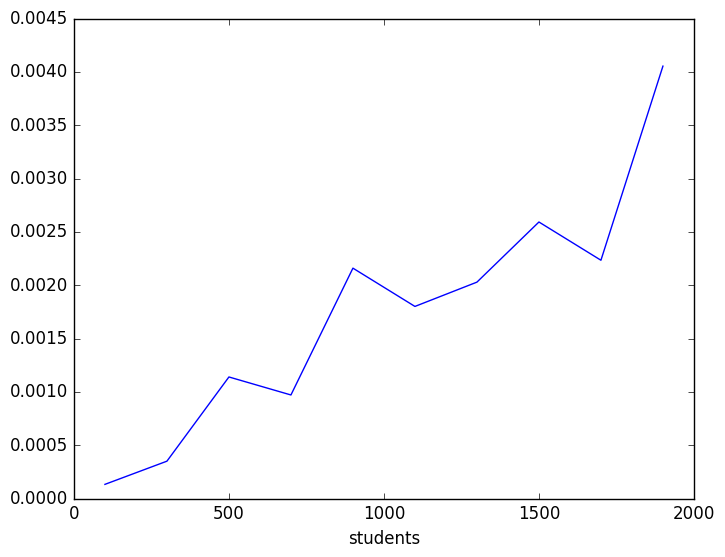

In [19]:
speedtest_plot2(100:200:2000, 100)

生徒側の人数にほぼ比例しているようです.

今まで定員をオーバーした時に大学にとって一番望ましくない人を弾くのに, 生徒の大学にとってのランキングを格納した[ヒープ](https://ja.wikipedia.org/wiki/%E3%83%92%E3%83%BC%E3%83%97)を使っていたのですが, ヒープを使わない時にはどれくらいの速度なのかを測るために新しいバージョンを作りました.


In [1]:
include("da.jl")

DA

In [2]:
deferred_acceptance = DA.call_match
include("test_deferred_acceptance.jl")
print()

Test Summary: | Pass  Total
Testing da.jl |   10     10


テストに通ったので速度を計測します. 事実上one2one, つまり```caps=ones(Int, n)```の形のマッチングに対して大学側、生徒側の数を等しく100から2000まで変えたものについて計測します.

In [11]:
one2one_times = Float64[]
one2many_times = Float64[]
for i in 1:20
    m = i * 100
    n = i * 100
    m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
    caps = ones(Int, n)
    _, elapsedtime, _, _, _ = @timed DA.call_match(m_prefs, f_prefs, caps)
    push!(one2many_times, elapsedtime)
    _, elapsedtime, _, _, _ = @timed DA.call_match(m_prefs, f_prefs)
    push!(one2one_times, elapsedtime)
end

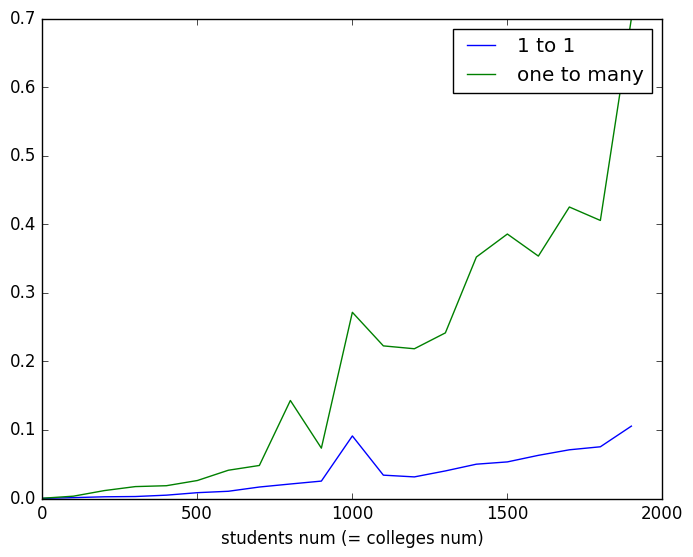

PyObject <matplotlib.legend.Legend object at 0x313ed39e8>

In [12]:
using PyPlot
plot(collect(1:100:2000), one2one_times, label="1 to 1")
plot(collect(1:100:2000), one2many_times, label="one to many")
PyPlot.xlabel("students num (= colleges num)")
legend()

one2oneがヒープを使用するone2manyとほぼ等しかったことから, かなり多くなったことがわかると思います...

In [13]:
@code_warntype DA.call_match(m_prefs, f_prefs, caps)

Variables:
  m_prefs::Array{Int64,2}
  f_prefs::Array{Int64,2}
  caps::Array{Int64,1}
  m::Int64
  n::Int64
  f_ranks::Array{Int64,2}
  m_pointers::Array{Int64,1}
  f_pointers::Array{Int64,2}
  f_holding::Array{Int64,1}
  m_matched_tf::BitArray{1}
  m_offers::Array{Int64,2}
  ##dims#8343::Tuple{Int64}
  ##dims#8344::Tuple{Int64,Int64}
  ##dims#8345::Tuple{Int64}
  ##args#8346::Tuple{Int64}
  ##dims#8347::Tuple{Int64,Int64}
  ##I#8348::Tuple{}

Body:
  begin  # /Users/neon/Desktop/S/zemi/DA_alg.jl/da.jl, line 10:
      GenSym(0) = (Base.arraysize)(m_prefs::Array{Int64,2},2)::Int64
      m = GenSym(0) # /Users/neon/Desktop/S/zemi/DA_alg.jl/da.jl, line 11:
      GenSym(1) = (Base.arraysize)(f_prefs::Array{Int64,2},2)::Int64
      n = GenSym(1) # /Users/neon/Desktop/S/zemi/DA_alg.jl/da.jl, line 13:
      f_ranks = (DA.get_ranks)(f_prefs::Array{Int64,2})::Array{Int64,2} # /Users/neon/Desktop/S/zemi/DA_alg.jl/da.jl, line 14:
      m_pointers = (Base.fill!)((Base.Array)(DA.Int,m::Int64)::Arra

In [16]:
Profile.clear()
@profile DA.call_match(m_prefs, f_prefs, caps)
Profile.print()

338 task.jl; anonymous; line: 447
 338 .../IJulia/src/IJulia.jl; eventloop; line: 143
  338 ...rc/execute_request.jl; execute_request_0x535c5df2; line: 183
   338 loading.jl; include_string; line: 282
    337 profile.jl; anonymous; line: 16
     21  ...zemi/DA_alg.jl/da.jl; call_match; line: 13
      13 ...zemi/DA_alg.jl/da.jl; get_ranks; line: 45
       6 multidimensional.jl; _unsafe_getindex; line: 193
       2 multidimensional.jl; _unsafe_getindex; line: 194
       2 multidimensional.jl; _unsafe_getindex; line: 195
      6  ...zemi/DA_alg.jl/da.jl; get_ranks; line: 47
      2  ...zemi/DA_alg.jl/da.jl; get_ranks; line: 49
     1   ...zemi/DA_alg.jl/da.jl; call_match; line: 16
      1 ...a/lib/julia/sys.dylib; call; (unknown line)
     315 ...zemi/DA_alg.jl/da.jl; call_match; line: 22
      48  ...emi/DA_alg.jl/da.jl; da_match; line: 156
       2  ...zemi/DA_alg.jl/da.jl; proceed_pointer!; line: 87
       10 ...zemi/DA_alg.jl/da.jl; proceed_pointer!; line: 88
       2  ...zemi/DA_alg.

In [8]:
m, n = 10000, 10000
m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
caps = ones(Int, n)
@time DA.call_match(m_prefs, f_prefs, caps)
@time DA.call_match(m_prefs, f_prefs)
@time DA.call_match(m_prefs, f_prefs, caps)
@time DA.call_match(m_prefs, f_prefs)
@time DA.call_match(m_prefs, f_prefs, caps)
@time DA.call_match(m_prefs, f_prefs)

 30.673545 seconds (3.04 M allocations: 39.778 GB, 13.88% gc time)
  3.486124 seconds (69.00 k allocations: 1.492 GB, 11.10% gc time)
 29.057338 seconds (3.04 M allocations: 39.778 GB, 14.20% gc time)
  3.467252 seconds (69.00 k allocations: 1.492 GB, 10.56% gc time)
 27.840235 seconds (3.04 M allocations: 39.778 GB, 14.06% gc time)
  3.650230 seconds (69.00 k allocations: 1.492 GB, 9.94% gc time)


([1673,4791,5677,4357,7571,971,9945,1215,8145,6782  …  2094,6830,5329,8388,5873,6920,9480,889,5601,4409],[0,2802,2047,1823,9309,6860,4617,6915,4647,5482  …  1316,7622,1617,8298,2606,8863,3005,6802,3523,3544])

findmaxが遅いみたいなので, その部分を実装しなおしました.

In [1]:
include("da.jl")

DA

In [2]:
deferred_acceptance = DA.call_match
include("test_deferred_acceptance.jl")
print()

Test Summary: | Pass  Total
Testing da.jl |   10     10


In [3]:
one2one_times = Float64[]
one2many_times = Float64[]
for i in 1:20
    m = i * 100
    n = i * 100
    m_prefs, f_prefs = DA.generate_random_preference_data(m, n)
    caps = ones(Int, n)
    _, elapsedtime, _, _, _ = @timed DA.call_match(m_prefs, f_prefs, caps)
    push!(one2many_times, elapsedtime)
    _, elapsedtime, _, _, _ = @timed DA.call_match(m_prefs, f_prefs)
    push!(one2one_times, elapsedtime)
end

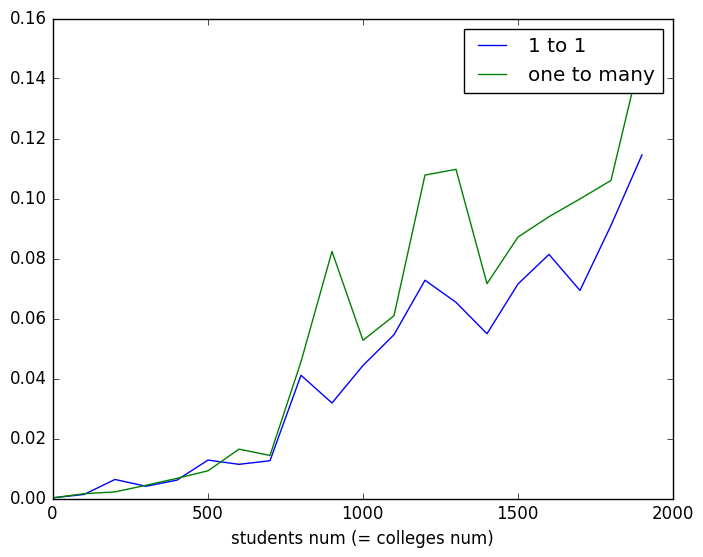

PyObject <matplotlib.legend.Legend object at 0x3219ad940>

In [4]:
using PyPlot
plot(collect(1:100:2000), one2one_times, label="1 to 1")
plot(collect(1:100:2000), one2many_times, label="one to many")
PyPlot.xlabel("students num (= colleges num)")
legend()

ヒープを使うバージョンとそれほど変わらないようです.